In [1]:
import pandas as pd

import os
import warnings

os.environ["OMP_NUM_THREADS"] = "1"
warnings.filterwarnings("ignore")

df = pd.read_csv("Student_performance_data.csv")

df.tail()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0
2391,3392,16,1,0,2,17.819907,13,0,2,0,0,0,1,2.140014,1.0


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [49]:
print(df['GradeClass'].unique())


[2. 1. 4. 3. 0.]


In [78]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#preparing the data for modeling
X = df.drop(['StudentID', 'GradeClass'], axis=1, inplace=False)
Y = df['GradeClass']

# One-hot encode categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


#Splitting data for training and testing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=25)
le = LabelEncoder()
Y_train_encoded = le.fit_transform(Y_train)

In [51]:

# One-hot encode the labels
Y_train_encoded = to_categorical(Y_train, num_classes=5)
Y_test_encoded = to_categorical(Y_test, num_classes=5)


In [52]:

# Build the model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))  # 5 classes

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [53]:
history = model.fit(X_train, Y_train_encoded, 
                    validation_data=(X_test, Y_test_encoded),
                    epochs=30, batch_size=32, verbose=1)


Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3332 - loss: 1.5103 - val_accuracy: 0.5303 - val_loss: 1.0917
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5353 - loss: 1.0967 - val_accuracy: 0.6430 - val_loss: 0.9390
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6425 - loss: 0.9348 - val_accuracy: 0.6889 - val_loss: 0.8736
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6917 - loss: 0.8732 - val_accuracy: 0.7432 - val_loss: 0.8413
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7211 - loss: 0.8643 - val_accuracy: 0.7537 - val_loss: 0.8100
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7292 - loss: 0.8271 - val_accuracy: 0.7516 - val_loss: 0.7976
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7452 - loss: 0.7958 - val_accuracy: 0.7495 - val_loss: 0.7757
Epoch 8/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7239 - loss: 0.7864 - val_accuracy: 0.7724 - val_loss:

In [54]:
loss, accuracy = model.evaluate(X_test, Y_test_encoded)
print("Test Accuracy:", accuracy)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8297 - loss: 0.6847 
Test Accuracy: 0.8371607661247253


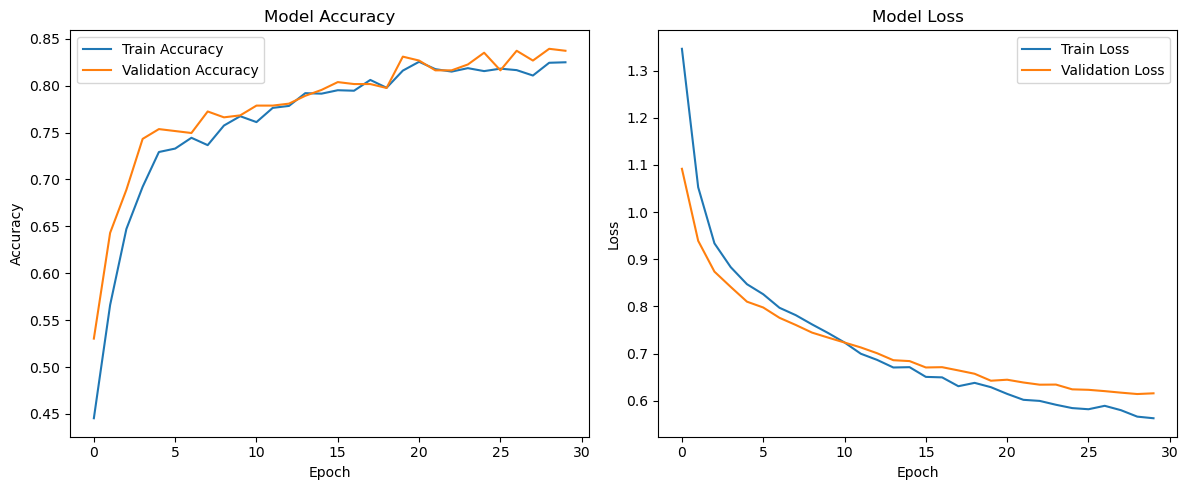

In [55]:
# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [56]:
pip install dash pandas scikit-learn tensorflow plotly


Note: you may need to restart the kernel to use updated packages.


Logistic Regression Method:

In [75]:
#train Logistic Regression
log_model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=0)

#Training
log_model.fit(X_train, Y_train_encoded)

#Predictions
log_pred = log_model.predict(X_test)

Evaluation Metrics:


Model Accuracy: 0.7724

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.06      0.12        31
         1.0       0.52      0.56      0.54        55
         2.0       0.60      0.62      0.61        71
         3.0       0.66      0.65      0.65        71
         4.0       0.90      0.98      0.94       251

    accuracy                           0.77       479
   macro avg       0.67      0.58      0.57       479
weighted avg       0.76      0.77      0.75       479


Confusion Matrix:
[[  2  18   1   6   4]
 [  0  31  17   3   4]
 [  1  10  44  12   4]
 [  0   1  10  46  14]
 [  0   0   1   3 247]]


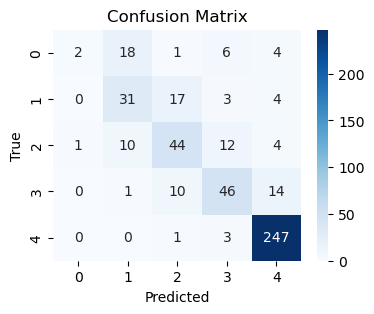

In [59]:
#Reports
accuracy = accuracy_score(Y_test, log_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(Y_test, log_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(Y_test, log_pred)
print(cm)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Random Forest Method:

In [80]:
#train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=3000,      
    max_depth=5,        
    random_state=0,
    class_weight='balanced'
)

#Training
rf_model.fit(X_train, Y_train_encoded)

#Predictions
rf_pred = rf_model.predict(X_test)

Evaluation Metrics:


Model Accuracy: 0.9311

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.65      0.78        31
         1.0       0.96      0.87      0.91        55
         2.0       0.93      0.92      0.92        71
         3.0       0.86      0.93      0.89        71
         4.0       0.94      0.98      0.96       251

    accuracy                           0.93       479
   macro avg       0.94      0.87      0.90       479
weighted avg       0.93      0.93      0.93       479


Confusion Matrix:
[[ 20   0   3   4   4]
 [  0  48   1   2   4]
 [  0   0  65   2   4]
 [  0   1   1  66   3]
 [  0   1   0   3 247]]


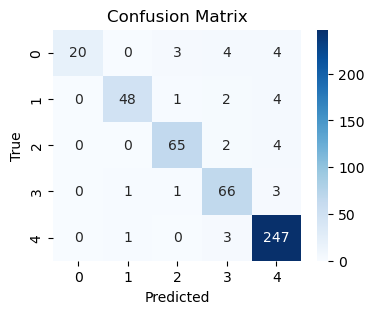

In [81]:
#Reports
accuracy = accuracy_score(Y_test, rf_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(Y_test, rf_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(Y_test, rf_pred)
print(cm)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

XGBoost Method:

In [82]:
#train XGBoost
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=5,  
    learning_rate=0.1,
    n_estimators=3000,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=0
)

#Training
xgb_model.fit(X_train, Y_train_encoded)

#Prediction
xgb_pred = xgb_model.predict(X_test)

Evaluation Metrics:


Model Accuracy: 0.9228

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.65      0.78        31
         1.0       0.89      0.87      0.88        55
         2.0       0.93      0.92      0.92        71
         3.0       0.87      0.92      0.89        71
         4.0       0.94      0.97      0.95       251

    accuracy                           0.92       479
   macro avg       0.92      0.86      0.89       479
weighted avg       0.92      0.92      0.92       479


Confusion Matrix:
[[ 20   0   3   4   4]
 [  0  48   1   2   4]
 [  0   1  65   1   4]
 [  0   1   1  65   4]
 [  0   4   0   3 244]]


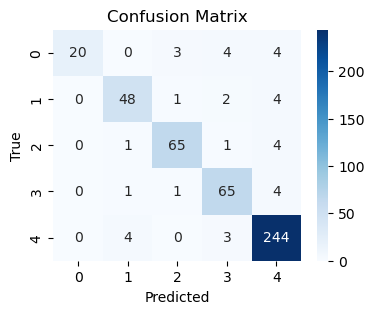

In [65]:
#Reports
accuracy = accuracy_score(Y_test, xgb_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(Y_test, xgb_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(Y_test, xgb_pred)
print(cm)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [66]:
def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()


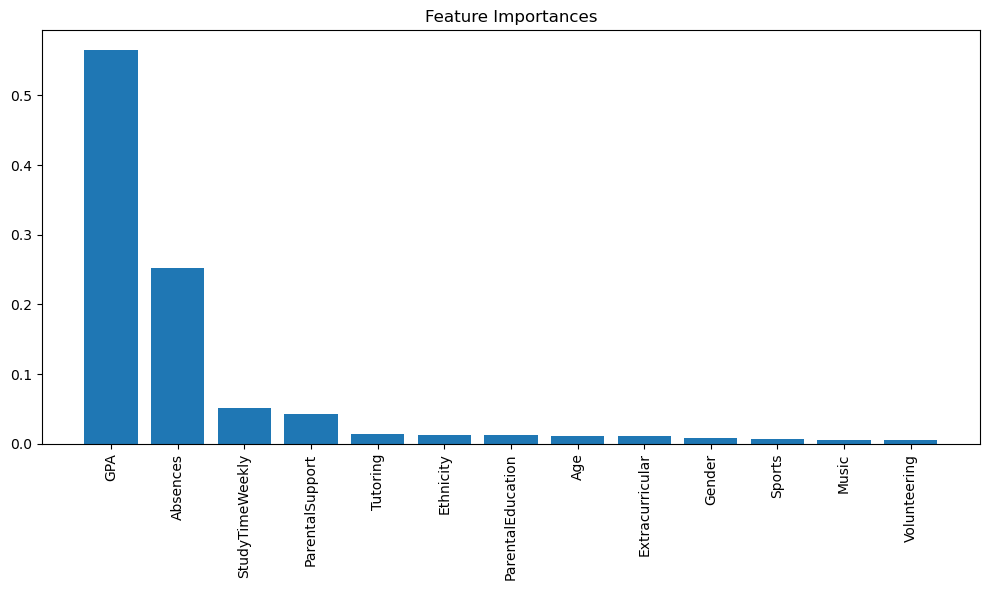

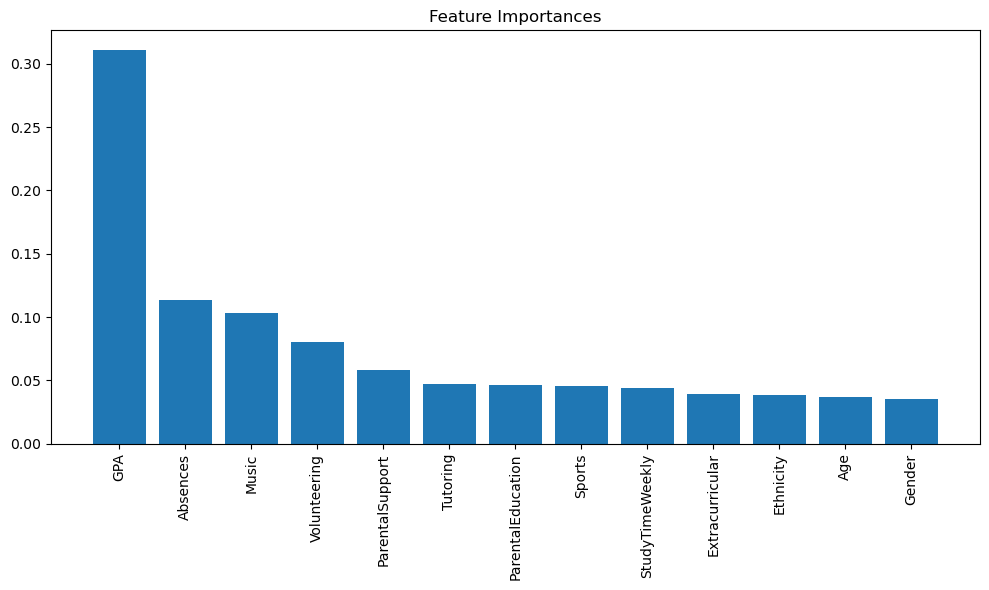

In [83]:
plot_feature_importance(rf_model, X.columns)
plot_feature_importance(xgb_model, X.columns)


In [ ]:
model.save("student_performance_model.h5")


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle

# Load the original dataset
df = pd.read_csv("Student_performance_data.csv", nrows=100)  # Load a smaller version

# Prepare the features and target
X = df.drop(['StudentID', 'GradeClass'], axis=1)
Y = df['GradeClass']

# Encode categorical columns (one-hot encoding)
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Fit StandardScaler on the encoded features
scaler = StandardScaler().fit(X_encoded)

# Fit LabelEncoder on the target
le = LabelEncoder().fit(Y)

# Save the transformer objects and feature names to .pkl files
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

with open("feature_names.pkl", "wb") as f:
    pickle.dump(X_encoded.columns.tolist(), f)

# Save a small version of the dataset to use for dropdowns in Dash
df.to_csv("Student_sample.csv", index=False)  # This creates a small sample CSV 

#latest version of the model
